## Sentiment analysis of IMDB reviews

In this final exercise, we explore text classification. We use the sample dataset of IMDB reviews. First, we fine-tune the language model, then use it as an encoder for a classification model. In order to get some insight into how the model works, we visualize word embeddings.

In this notebook, you will find sections with `#TO DO` that you need to replace with your code.

**Skip this cell if you have already ran this notebook before !**

In [ ]:
# Install requirements
!pip install scipy
!pip install --upgrade fastai

Let's start !

In [2]:
from fastai.text.all import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)

In [4]:
path.ls()

(#2) [Path('/home/azureuser/.fastai/data/imdb_sample/texts.csv'),Path('/home/azureuser/.fastai/data/imdb_sample/models')]

In [6]:
df = pd.read_csv(path/"texts.csv")

,label,text,is_valid
0,negative,"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!",False
1,positive,"This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...",False
2,negative,"Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt li...",False
3,positive,"Name just says it all. I watched this movie with my dad when it came out and having served in Korea he had great admiration for the man. The disappointing thing about this film is that it only concentrate on a short period of the man's life - interestingly enough the man's entire life would have made such an epic bio-pic that it is staggering to imagine the cost for production.<br /><br />Some posters elude to the flawed characteristics about the man, which are cheap shots. The theme of the movie ""Duty, Honor, Country"" are not just mere words blathered from the lips of a high-brassed offic...",False
4,negative,"This movie succeeds at being one of the most unique movies you've seen. However this comes from the fact that you can't make heads or tails of this mess. It almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid. If you don't want to feel slighted you'll sit through this horrible film and develop a real sense of pity for the actors involved, they've all seen better days, but then you realize they actually got paid quite a bit of money to do this and you'll lose pity for them just like you've alr...",False


### Fine-tuning the language model
Before we train the classification model, we fine-tune a language model in order to capture the the dataset's vocabulary.

#### Define the language model's dataloaders

In [8]:
#TO DO
dls_lm = TextDataLoaders.from_csv(#TO DO)
dls_lm.show_batch(max_n=3)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,text_
0,"xxbos i was pleasantly surprised i quite liked this movie . xxmaj witty writing ( some "" inside "" jokes i got , others i did n't - maybe due to actors speaking on top of one another ) , great acting ( notably xxmaj john xxmaj xxunk ) , great cameos , interesting and unique directing . i rented it to see xxmaj jeffrey xxmaj meek ( very disappointed he was","i was pleasantly surprised i quite liked this movie . xxmaj witty writing ( some "" inside "" jokes i got , others i did n't - maybe due to actors speaking on top of one another ) , great acting ( notably xxmaj john xxmaj xxunk ) , great cameos , interesting and unique directing . i rented it to see xxmaj jeffrey xxmaj meek ( very disappointed he was in"
1,"an explosive device xxunk in it , the xxunk choose to shoot the agent while driving past , then blow up her car . xxmaj which was also clearly done with cgi . xxmaj sound confusing ? xxmaj it is , and so is the rest of the movie . \n\n i might point out that when i say cgi , we are n't talking about xxmaj lord xxmaj of xxmaj the","explosive device xxunk in it , the xxunk choose to shoot the agent while driving past , then blow up her car . xxmaj which was also clearly done with cgi . xxmaj sound confusing ? xxmaj it is , and so is the rest of the movie . \n\n i might point out that when i say cgi , we are n't talking about xxmaj lord xxmaj of xxmaj the xxmaj"
2,"'m only wondering who enjoys seeing this stuff . \n\n xxmaj there 's no reason to go on with the rest of the movie . xxmaj well , xxmaj i 'll mention one example of an "" implausibility , "" since i brought the idea up . mckenna has been kidnapped and locked in a dark bare xxunk . xxmaj he knows he 's going to be xxunk half to death in","only wondering who enjoys seeing this stuff . \n\n xxmaj there 's no reason to go on with the rest of the movie . xxmaj well , xxmaj i 'll mention one example of an "" implausibility , "" since i brought the idea up . mckenna has been kidnapped and locked in a dark bare xxunk . xxmaj he knows he 's going to be xxunk half to death in the"


#### Train the language model
Let's fine tune the language model on our dataset.

In [9]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

Let's find the right learning rate !

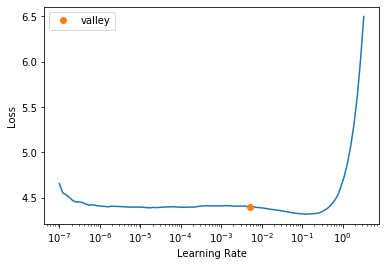

In [10]:
learn.lr_find()

Use the learning rate we found in `lr_find()`:

In [16]:
learn.fine_tune(5, #TO DO)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.259637,4.073916,0.277762,58.786747,00:39


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.972594,3.966010,0.284583,52.773560,00:48
1,3.837336,3.877387,0.290086,48.297840,00:48
2,3.686041,3.864803,0.290907,47.693890,00:48
3,3.541432,3.870871,0.290861,47.984154,00:48
4,3.436910,3.872451,0.290721,48.060051,00:48


Let's save the fine-tuned language model, which will be used as an encoder for our classifier.

In [17]:
learn.save_encoder('finetuned')

#### Evaluate the language model
Let's try to have a peek at our language model. First, let's try a few examples of predictive text, then let's have a look a word embeddings.

**Predictive text**

In [18]:
TEXT = #TO DO: Pick whatever sentence you want to complete !
N_WORDS = 40
preds = learn.predict(TEXT, N_WORDS, temperature=0.75) 

In [19]:
print(preds)

i hated this movie because of its humor . It 's a shame that i never read The Adventures of Adventures of Ginger Rogers . i saw it without George Lopez , but i felt it was
i hated this movie because i was like watching a " classic " episode " in the first place ( and is really so disappointed ) , and i saw this episode when i saw it for the first time . Like all of


**Visualize the word embeddings**

Let's compute the distance between word embeddings in a few examples, then visualize word embeddings in a scatter plot.

In [72]:
from scipy.spatial.distance import cosine as dist
from sklearn.manifold import TSNE

In [73]:
net = learn.model
encoder = net[0]
enc = list(encoder.children())[0]
w = enc.weight

In [78]:
embeddings = {dls_lm.vocab[i]: w[i].cpu().detach().numpy() for i in range(len(w))}

**TO DO** Let's compute distances between related words (examples: movie, film, show, performance) and unrelated words (example: king and horror) and let's discuss what we see!

In [ ]:
#TO DO !

**Visualize the scatter plot of embeddings**

Let's visualize a simple scatter plot of the word embeddings. Our embeddings are of dimension=100, in order to visualize them in a scatter plot we need to use a dimensionality reduction method. In this example, we choose t-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding). 

Let's take a subset of words only. Taking all of them will make the figure too crowded.

In [134]:
words = dls_lm.vocab[100:500]

**TO DO** Compute the subset of embeddings of the words that we define above in the variable `words`. 

In [135]:
subset = #TO DO

Let's compute the dimensionality reduction of our embedding:

In [136]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
Y = tsne.fit_transform(subset)

Let's plot a scatter plot of our embeddings:

In [137]:
df_tsne = pd.DataFrame(Y, columns=["X", "Y"])
df_tsne["word"] = words

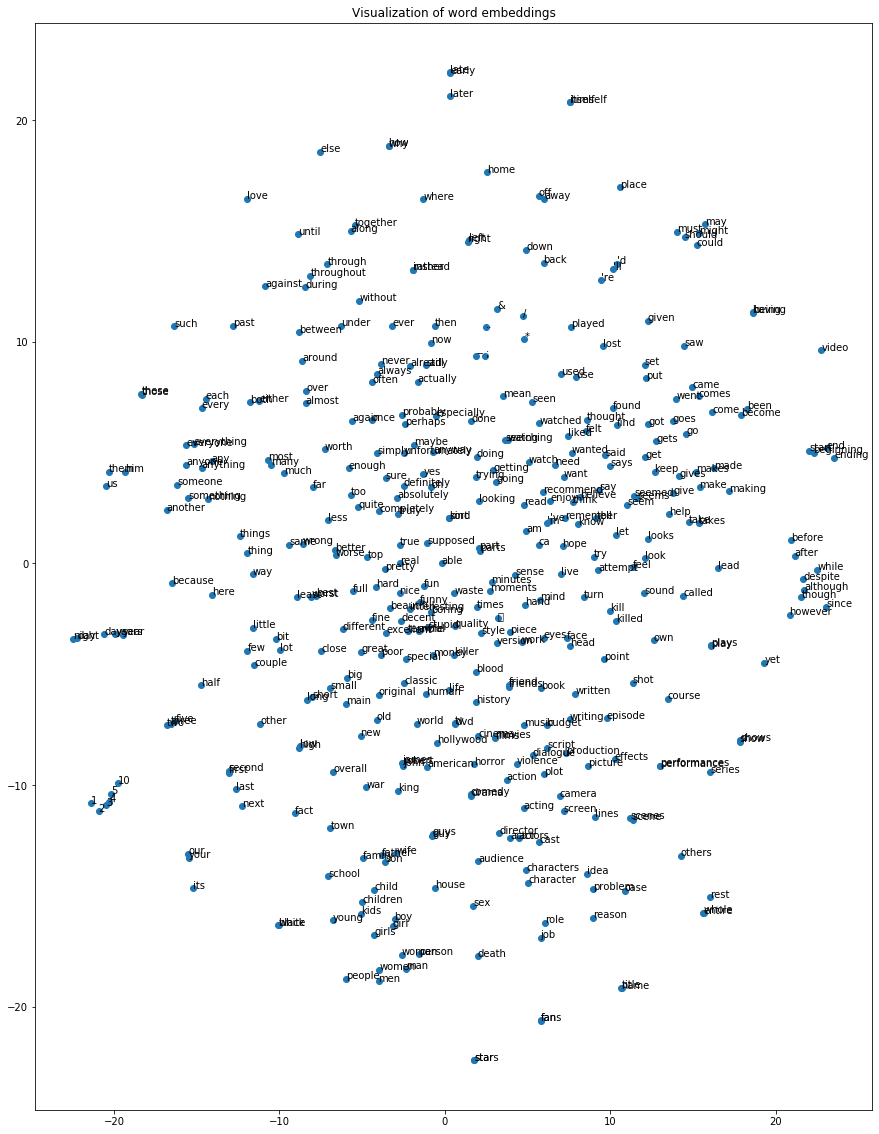

In [139]:
fig, ax = plt.subplots(figsize=(15, 20))
ax.scatter(df_tsne["X"], df_tsne["Y"])

for i, txt in enumerate(df_tsne["word"]):
    ax.annotate(txt, (df_tsne["X"][i], df_tsne["Y"][i]))
plt.title("Visualization of word embeddings")
plt.show()

**TO DO** Let's discuss what we see on the scatter plot !

### Train the classifier
Now that we have fine-tuned our language model, let's train our sentiment classifier !

#### Define the classifier's DataLoaders

**TO DO** Complete the definition of the DataLoaders

In [56]:
# First, let's define the DataBlock
imdb_clas = DataBlock(
    blocks=(TextBlock.from_df('text', seq_len=72, vocab=#TO DO), #TO DO),
    get_x=#TO DO, get_y=ColReader('label'))

dls = #TO DO
dls.show_batch(max_n=2)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,text,category
0,"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain xxunk on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an xxunk storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is",negative
1,"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject , but xxmaj soderbergh 's most recent stinker , xxmaj the xxmaj girlfriend xxmaj xxunk ) , was also missing a story , so narrative ( and editing ? ) seem to suddenly be xxmaj soderbergh 's main challenge . xxmaj strange , after xxunk years in the business . xxmaj he was probably never much good at narrative , just xxunk it well inside "" edgy "" projects . \n\n xxmaj none of this excuses him this present , almost diabolical",negative


**Define the learner**

In [57]:
learn_clas = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

**Loading the encoder** 

Here, we load the encoder that we have saved after fine-tuning the language model.

**TO DO** Complete loading the encoder. **Note**: under `path` a folder named `models` is created to save the encoder.

In [58]:
learn_clas = learn_clas.load_encoder(#TO DO)

Let's find the right learning rate !

SuggestedLRs(valley=0.002511886414140463)

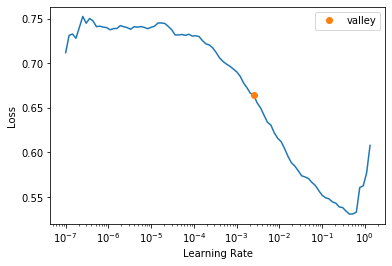

In [59]:
learn_clas.lr_find()

Let's use the learning rate we found to fine tune the model.

In [60]:
learn_clas.fine_tune(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.637240,0.609465,0.685000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.458040,0.540361,0.785000,00:40
1,0.428962,0.453770,0.800000,00:40
2,0.389015,0.388726,0.795000,00:40
3,0.354603,0.415272,0.785000,00:40
4,0.324006,0.389126,0.830000,00:40
5,0.291672,0.365340,0.820000,00:40
6,0.259270,0.357621,0.825000,00:40
7,0.233266,0.368664,0.835000,00:40
8,0.210491,0.368050,0.840000,00:40
9,0.193051,0.378783,0.825000,00:40


### OPTIONAL: Gradual unfreezing

Instead of fine-tuning the model using `fine_tune()`, we leverage gradual unfreezing.

In [34]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [35]:
learn = learn.load_encoder(path/'models'/'finetuned')

In [36]:
learn.fit_one_cycle(1, 2e-2)
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.598332,0.598947,0.720000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.464861,0.494995,0.800000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.345892,0.408132,0.810000,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.256473,0.385331,0.815000,00:41
1,0.231547,0.412497,0.805000,00:41
2,0.203787,0.396763,0.820000,00:41
3,0.178303,0.413583,0.795000,00:41
